# Ergodicity and Density Dynamics simulations

The parameters are saved in the file `parameters.jl`. Let's start by importing the module `ThermostattedDynamics`

In [1]:
using ThermostattedDynamics

Let's import the parameters file

In [2]:
include("parameters.jl")

ThermostattedDynamics.Integrator{ODE.#ode4}("RK4",ODE.ode4)

And codify them in the predefined type Parameters

In [3]:
parameters = Parameters(T, Q, dtsampling, dt, nsimulations, nsteps, thermo, potential, integrator)

ThermostattedDynamics.Parameters(1.0,0.1,0.0125,0.0025,50,50000,ThermostattedDynamics.Thermostat{##1#2}("logistic",#1),ThermostattedDynamics.Potential{##3#4}("quartic",#3),ThermostattedDynamics.Integrator{ODE.#ode4}("RK4",ODE.ode4))

You may change the parameters from here. For instance, let's change the integrator from a Runge Kutta RK4 with fixed stepsize to an adaptative RK45 (the integrator, for the moment, must be supported in the package [ODE.jl](https://github.com/JuliaDiffEq/ODE.jl)

In [4]:
parameters.integrator

ThermostattedDynamics.Integrator{ODE.#ode4}("RK4",ODE.ode4)

In [5]:
parameters.integrator = Integrator("RK45", ode45)

ThermostattedDynamics.Integrator{ODE.#ode45_dp}("RK45",ODE.ode45_dp)

We are ready to calculate the Lyapunov Spectrum for `nsimulations` initial conditions

In [6]:
parameters.nsimulations

50

And let's compute the lyapunov exponents by calling the function `lyapunov_exponents`

In [7]:
lyap = lyapunov_exponents(parameters)

10×6 Array{Float64,2}:
 0.251596  -0.00434412   -0.248672   0.555758  -1.13173    0.106995 
 0.232747  -0.00451457   -0.228323   0.073487   1.22573    0.0569483
 0.24909   -0.0028183    -0.246916   0.276219   1.01162   -0.258072 
 0.260712  -0.00258879   -0.256611   0.689821  -1.05629   -0.0844637
 0.224906  -0.00345418   -0.236129   2.33596    1.81451   -0.146453 
 0.236867  -0.00188047   -0.241205   1.35649    1.81838    0.327269 
 0.230585   0.000538558  -0.243673   1.91817   -3.16122    0.0875408
 0.239159  -0.00043631   -0.239928  -0.323678  -0.742871   0.169037 
 0.252973   0.000722395  -0.252661   0.607926  -0.157251  -0.061529 
 0.236661  -0.00519433   -0.236734  -1.29333   -0.931007   0.453476 

The data is generated in the format

$$\lambda_1 \quad \lambda_2 \quad \lambda_3 \quad q_0 \quad p_0 \quad \zeta_0 \quad$$

Let's see what are the maximum and minimum of the first exponent

In [8]:
maximum(lyap[:,1]), minimum(lyap[:,1])

(0.26071246518418545,0.22490585087750914)

You may save the generated data with the function `save_lyapunov`. For that let's choose a filename

In [9]:
filename = "lyapunovdata"
save_lyapunov(filename, lyap, parameters)

The file lyapunovdata.hdf5 was saved in the folder `../data/`


Now, let's integrate an initial random condition for a total time equal to `nsteps*dt*nsimulations` by calling the function `trajectory`. The parameter `nsimulations` indicates how many parts of the trajectory are generated. Each part contains a segment of length `nsteps*dt`

In [7]:
trajec = trajectory(parameters)

Part 1 done. 
Part 2 done.
Part 3 done.
Part 4 done.
Part 5 done.
Part 6 done.
Part 7 done.
Part 8 done.
Part 9 done.
Part 10 done.
Part 11 done.
Part 12 done.
Part 13 done.
Part 14 done.
Part 15 done.
Part 16 done.
Part 17 done.
Part 18 done.
Part 19 done.
Part 20 done.
Part 21 done.
Part 22 done.
Part 23 done.
Part 24 done.
Part 25 done.
Part 26 done.
Part 27 done.
Part 28 done.
Part 29 done.
Part 30 done.
Part 31 done.
Part 32 done.
Part 33 done.
Part 34 done.
Part 35 done.
Part 36 done.
Part 37 done.
Part 38 done.
Part 39 done.
Part 40 done.
Part 41 done.
Part 42 done.
Part 43 done.
Part 44 done.
Part 45 done.
Part 46 done.
Part 47 done.
Part 48 done.
Part 49 done.
Part 50 done.


500001×4 Array{Float64,2}:
    0.0     -0.372509   -0.385183   0.123713  
    0.0125  -0.377162   -0.359806   0.112945  
    0.025   -0.381519   -0.337721   0.101965  
    0.0375  -0.38562    -0.318628   0.0908131 
    0.05    -0.389499   -0.302305   0.0795173 
    0.0625  -0.393188   -0.288536   0.0681043 
    0.075   -0.396719   -0.277107   0.0566007 
    0.0875  -0.400124   -0.267834   0.0450283 
    0.1     -0.403425   -0.260621   0.0334005 
    0.1125  -0.406648   -0.255382   0.0217312 
    0.125   -0.409817   -0.25203    0.0100342 
    0.1375  -0.412956   -0.250492  -0.00167772
    0.15    -0.416087   -0.250763  -0.0133937 
    ⋮                                         
 6249.86    -0.0940898  -0.452171   0.0825594 
 6249.88    -0.0996098  -0.43177    0.0724949 
 6249.89    -0.104897   -0.414573   0.0622328 
 6249.9     -0.109989   -0.400406   0.0518078 
 6249.91    -0.11492    -0.38912    0.0412526 
 6249.93    -0.119727   -0.380568   0.0305999 
 6249.94    -0.124444   -0.37461 

The data is generated in the format 
    $$t \quad q \quad p \quad \zeta$$
You may plot it

In [8]:
using PyPlot

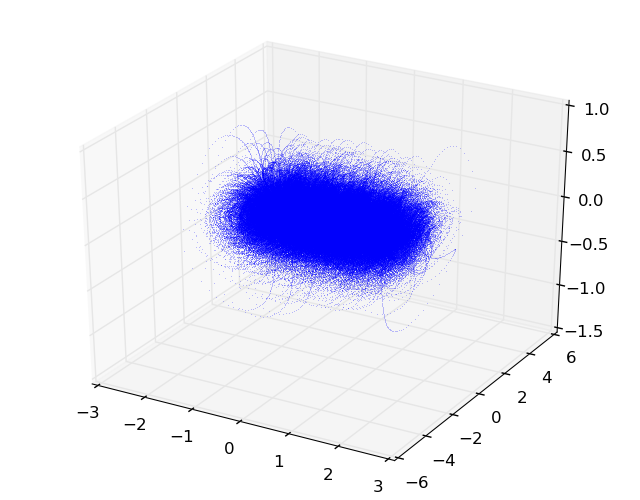

In [9]:
plot3D(trajec[:,2], trajec[:,3], trajec[:,4], ".", ms = 0.5, alpha = 0.3);

You may save the trajectory in an .hdf5 file with the command `save_trajectory`

In [10]:
filename = "trajecquart"
save_trajectory(filename, trajec, parameters)

The file trajecquart.hdf5 was saved in the folder `../data/`


## Poincaré sections

In [11]:
zsection = section(trajec, parameters, "z")

15275×4 Array{Float64,2}:
    0.13571   -0.412507  -0.250611    6.19403e-13
    0.925674  -1.04033   -0.0994795   2.68845e-13
    1.90815   -0.392833   0.103587    4.52596e-13
    2.8708     0.284162   0.109662    2.96526e-13
    3.83168    0.937777  -0.0309836   8.33457e-13
    4.71433    0.293663  -0.158911    6.46495e-13
    5.60351   -0.371461  -0.155058    4.57023e-13
    6.49323   -1.01141    0.0106968   5.28848e-13
    7.3617    -0.373708   0.17124     1.53842e-13
    8.23199    0.288458   0.175328    6.08808e-13
    9.09436    0.93063    0.054303    2.76668e-13
   10.1006     0.2706    -0.0886554   6.81982e-13
   11.1064    -0.413659  -0.0801242   7.7792e-13 
    ⋮                                            
 6239.89      -1.14573    2.14437    -9.45072e-13
 6240.71      -0.474883   1.88688    -7.41072e-13
 6241.46       0.171721   1.88926    -8.00559e-13
 6242.23       0.825005   1.93059    -1.75716e-13
 6243.06       0.821936  -2.62099    -4.13374e-13
 6244.06       0.132413 

The generated array has the same structure than the array generated by the function `trajectory`

In [12]:
psection = section(trajec, parameters, "p")

1934×4 Array{Float64,2}:
    1.01958  -1.04502   -2.97146e-13  -0.0935982 
    6.48288  -1.01147   -8.4424e-13    0.0103484 
   12.0112   -1.07688   -5.83742e-13   0.143426  
   18.6405   -1.62269   -6.83316e-13  -0.0230456 
   26.2242   -1.90947   -5.05747e-13   0.486704  
   35.3932   -1.71112   -1.26933e-13  -0.0954247 
   42.0642   -1.11557   -7.07154e-13  -0.110878  
   47.7332   -1.16398   -1.60589e-13   0.200976  
   53.9118   -1.16214   -5.64164e-13  -0.0805175 
   59.8162   -0.924006  -4.88729e-13   0.550204  
   65.5966   -0.926381  -9.37587e-13   0.00115566
   71.2368   -0.913803  -7.97508e-13  -0.409947  
   77.0257   -1.37235   -3.51949e-13   0.339938  
    ⋮                                            
 6175.51      1.16993    4.64905e-13  -0.192532  
 6181.21      1.14767    9.01693e-13   0.151856  
 6187.39      1.14876    7.43466e-13  -0.174024  
 6193.04      1.12408    2.00393e-13   0.128064  
 6199.81      1.77894    2.08767e-13   0.192294  
 6207.95      1.86463    

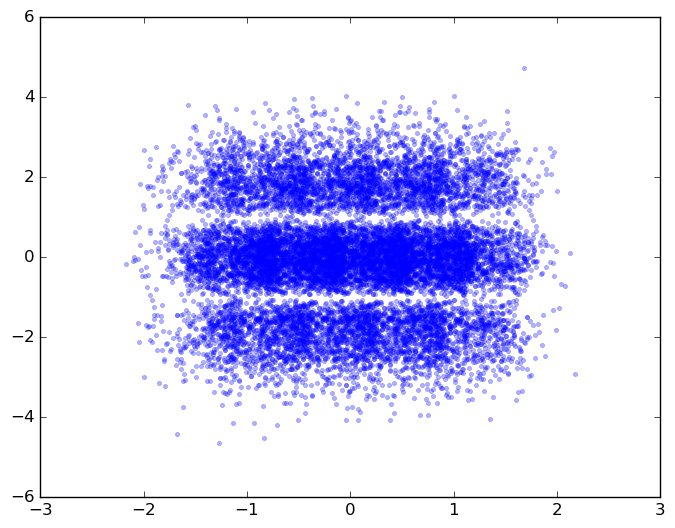

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc495d73110>

In [15]:
plot(zsection[:,2], zsection[:,3], ".", alpha = 0.3)

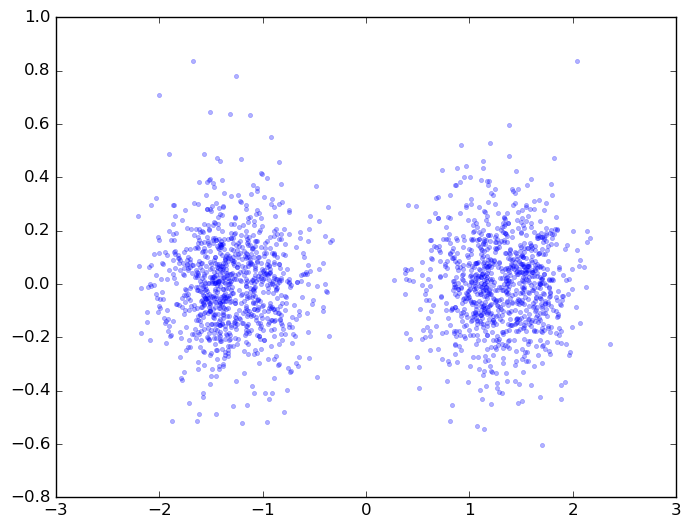

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc495d2b410>

In [16]:
plot(psection[:,2], psection[:,4], ".", alpha = 0.3)

## Marginal distributions

The normalization factor $Z$ corresponds to the configurational partition function, i.e.
    
$$ \rho(q) = \frac{e^{-\beta V(q)}}{Z} $$

$$ Z = \int_{-\infty}^{\infty} e^{-\beta V(q)} $$

For the quartic potential with $\beta = 1.0$, $Z = 2.563693352$

In [17]:
Z = 2.563693352
data_marg = marginaldistributions(trajec, parameters, Z)

500001×6 Array{Float64,2}:
 -0.372509   0.388189  -0.385183  0.370419   0.123713    1.7434 
 -0.377162   0.388094  -0.359806  0.373937   0.112945    1.84598
 -0.381519   0.388002  -0.337721  0.376828   0.101965    1.9482 
 -0.38562    0.387912  -0.318628  0.379197   0.0908131   2.04794
 -0.389499   0.387824  -0.302305  0.381123   0.0795173   2.14301
 -0.393188   0.387739  -0.288536  0.382677   0.0681043   2.23113
 -0.396719   0.387654  -0.277107  0.383916   0.0566007   2.31   
 -0.400124   0.387571  -0.267834  0.384887   0.0450283   2.37744
 -0.403425   0.387488  -0.260621  0.385621   0.0334005   2.43155
 -0.406648   0.387405  -0.255382  0.386143   0.0217312   2.47072
 -0.409817   0.387321  -0.25203   0.386471   0.0100342   2.49372
 -0.412956   0.387237  -0.250492  0.386621  -0.00167772  2.49982
 -0.416087   0.38715   -0.250763  0.386594  -0.0133937   2.48882
  ⋮                                                      ⋮      
 -0.0940898  0.390055  -0.452171  0.360174   0.0825594   2.1181

The data is saved in the format
$$q \quad \rho(q) \quad p \quad \rho(p) \quad \zeta \quad \rho(\zeta)  $$

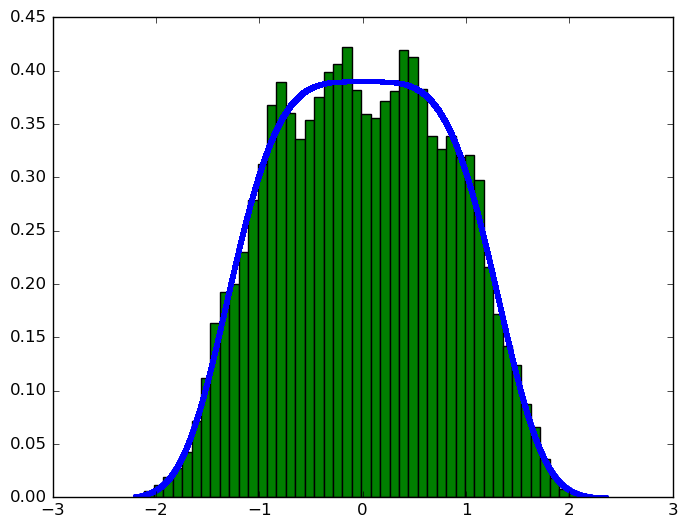

In [18]:
plot(data_marg[:,1], data_marg[:,2], ".", lw = 0.2)
plt[:hist](data_marg[:,1], 50, normed = true);

As long as the trajectory is increased, the correspondence between the histogram and the theoretical marginal distribution improves

## Hellinger distance

In [21]:
?hellingerdistance

search: hellingerdistance



This function returns the hellinger distance calculated in n (10 by default) different intervals of a trajectory together with its error. The normalization factor associated with the distribution in `q` is passed as an argument. Example:

```
julia> hellingerdistance(filename, Potential("quartic", x->x^4./4.),
Thermostat("logistic", Q, x -> exp(x/Q)/(Q*(1.+ exp(x/Q)).^2)), normalizationfactor, n)
```


In [22]:
data_hell = hellingerdistance(trajec, parameters, Z)

1
2
3
4
5
6
7
8
9
10


10×3 Array{Float64,2}:
  123.75  0.0776613  0.000775798
  248.75  0.079786   0.000796632
  373.75  0.0630056  0.000629   
  498.75  0.0584512  0.000582449
  623.75  0.0559881  0.000557007
  748.75  0.0532363  0.000528193
  873.75  0.054953   0.000547241
  998.75  0.0502745  0.000502543
 1123.75  0.0480994  0.000479161
 1248.75  0.044693   0.000446313

The data is returned in the format $$time \quad hellinger \quad error $$

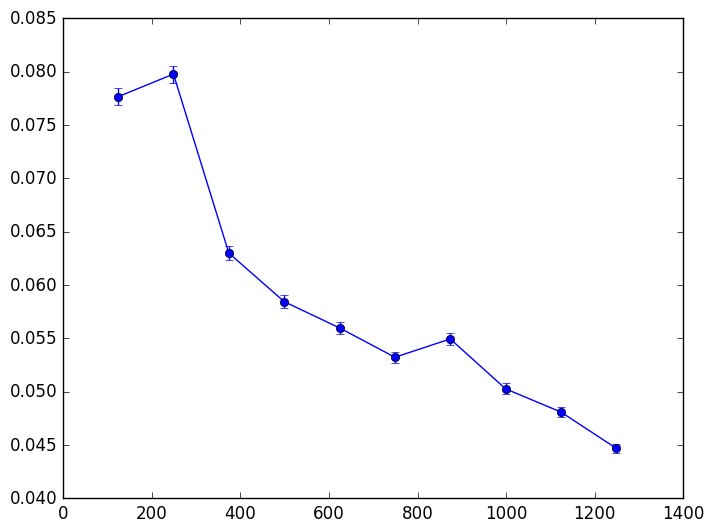

In [23]:
plt[:errorbar](data_hell[:,1], data_hell[:,2], yerr = data_hell[:,3], fmt = "o-");

As long as the trajectory is increased, the correspondence between the histogram and the theoretical marginal distribution improves

## Other thermostats

Consider, for instance, the Nosé-Hoover thermostat. In the density dynamics formalism it is given by

In [24]:
thermo = Thermostat("Nose-Hoover", x-> 1.0 / sqrt(T*2*pi*Q) *exp(-x^2./(T*2*Q))) 

ThermostattedDynamics.Thermostat{##5#6}("Nose-Hoover",#5)

In [25]:
parameters.thermo = thermo
parameters.potential = Potential("Harmonic", x->x^2./2.0)

ThermostattedDynamics.Potential{##7#8}("Harmonic",#7)

In [29]:
trajNH = trajectory(parameters)

Part 1 done. 
Part 2 done.
Part 3 done.
Part 4 done.
Part 5 done.
Part 6 done.
Part 7 done.
Part 8 done.
Part 9 done.
Part 10 done.


100001×4 Array{Float64,2}:
    0.0     -0.295468  0.00296057   0.0178663 
    0.0125  -0.295408  0.00664709   0.00536665
    0.025   -0.295301  0.0103405   -0.00713244
    0.0375  -0.295149  0.0140511   -0.0196306 
    0.05    -0.294952  0.0177868   -0.0321278 
    0.0625  -0.294708  0.0215602   -0.0446234 
    0.075   -0.294416  0.0253847   -0.057117  
    0.0875  -0.294076  0.0292736   -0.0696081 
    0.1     -0.293686  0.0332403   -0.0820961 
    0.1125  -0.293245  0.037298    -0.0945806 
    0.125   -0.292752  0.0414601   -0.107061  
    0.1375  -0.292205  0.04574     -0.119537  
    0.15    -0.291603  0.050151    -0.132007  
    ⋮                                         
 1249.86     1.33467   0.472014    -0.138651  
 1249.88     1.34052   0.463688    -0.148417  
 1249.89     1.34627   0.455705    -0.158276  
 1249.9      1.35191   0.448058    -0.168223  
 1249.91     1.35747   0.440742    -0.178253  
 1249.92     1.36294   0.433754    -0.188363  
 1249.94     1.36832   0.427089  

In [30]:
zsNH = section(trajNH, parameters, "z")

1461×4 Array{Float64,2}:
    0.0178669  -0.295368   0.00823139   9.92773e-14
    1.76632     0.804344  -0.166098     9.98416e-13
    3.21456    -0.411007  -0.239854     4.41797e-13
    5.10556    -1.48648    0.497788     7.17314e-13
    6.43569    -0.222716   0.601051     1.17075e-13
    7.69521     0.993928   0.587888     2.77082e-13
    9.40573     2.28283   -0.37996      6.59742e-13
   10.9019      0.881704  -0.765665     1.62615e-13
   12.0629     -0.264334  -0.720298     3.93846e-13
   13.3077     -1.48228   -0.772473     3.67943e-13
   15.7315     -0.61106    0.275288     5.58438e-13
   17.1343      0.61392    0.27483      7.72493e-13
   19.6087      1.47142   -0.776287     4.07751e-13
    ⋮                                              
 1230.41        0.942193  -1.28771     -9.87798e-13
 1232.07       -0.666081  -1.26833     -6.41211e-13
 1233.6        -2.03544   -2.04043     -7.63323e-13
 1234.61       -2.06605    1.61383     -4.84509e-13
 1236.09       -0.670602   1.16641     

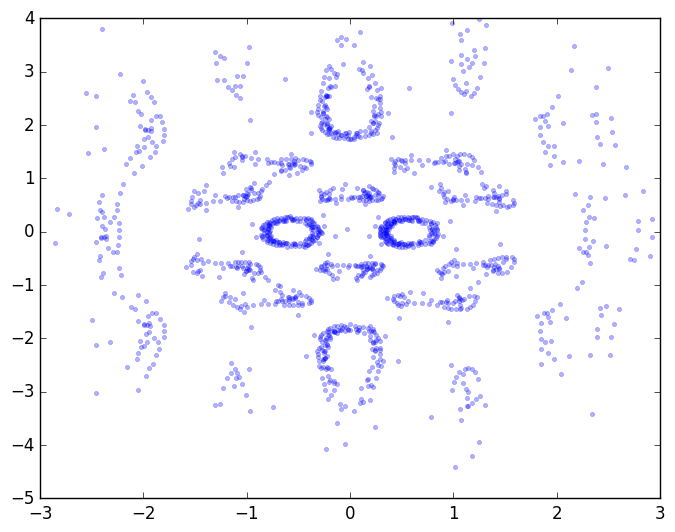

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0cd6255710>

In [31]:
plot(zsNH[:,2],zsNH[:,3], ".", alpha = 0.3)